In [1]:
import pandas as pd
import numpy as np
import os 
from Config import Config
import matplotlib.pyplot as plt

In [2]:
f_name = "viasna_dailyCounts_Aug_March.csv"
path = os.path.join(Config.proccessed_data_dir, Config.viasna_data_subdir, f_name)
viasna = pd.read_csv(path)
viasna.date = pd.to_datetime(viasna.date).dt.date
viasna.head()

,date,num_prisoners,num_incidents,day_of_week
0,2020-08-09,5.0,3630.0,Sunday
1,2020-08-10,18.0,1799.0,Monday
2,2020-08-11,7.0,1093.0,Tuesday
3,2020-08-12,6.0,274.0,Wednesday
4,2020-08-13,3.0,48.0,Thursday


In [3]:
f_path = os.path.join(Config.proccessed_data_dir, Config.chat_data_subsets_subdir, Config.analysis_data_file)
df=pd.read_csv(f_path)


/var/folders/ht/m3lhbch97rbfp8h0sn087g240000gn/T/ipykernel_38256/3208407357.py:2: DtypeWarning: Columns (24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(f_path)


In [4]:
plt.figure()
plt.rcParams.update({'font.size': 20}) # must set in top


<Figure size 432x288 with 0 Axes>

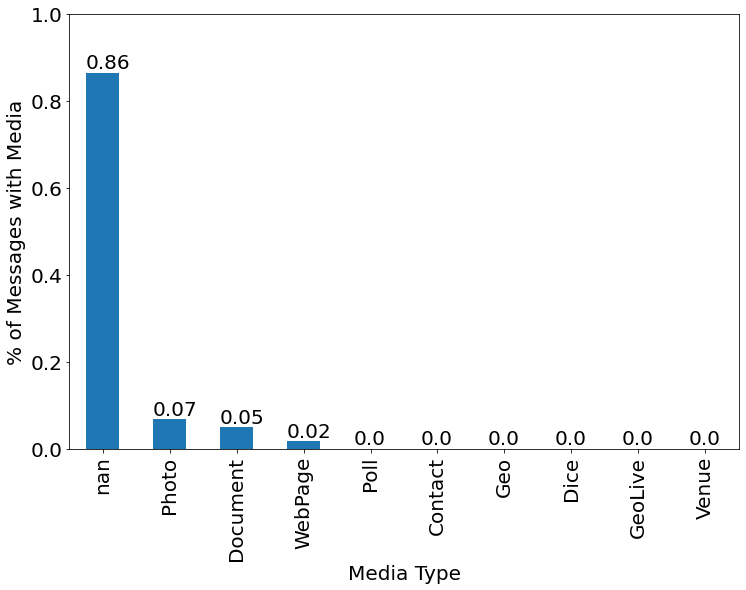

In [5]:
ax = (df.media_type
.value_counts(normalize=True, dropna=False)
.plot(kind="bar", ylim=[0,1], figsize=(12, 8), xlabel="Media Type", ylabel="% of Messages with Media")
)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x(), p.get_height() + 0.01))

In [6]:
# filter data 
filt = df.message.notna() | df.media.notna()
df_filt = df.loc[filt,:].reset_index()


In [7]:
df_filt.date = pd.to_datetime(df_filt.date).dt.date

In [8]:
# Daily number of posts
daily_tot_msgs = (
    df_filt
    .groupby(["date"])["message"]
    .count()
    .reset_index()
    .rename(columns={"message":"tot_msgs"})
)

# Daily number of users
daily_tot_users = (
    df_filt
    .groupby(["date"])["from_user_id"]
    .nunique(dropna=True)
    .reset_index()
    .rename(columns={"from_user_id":"tot_users"})
)

# Daily number of new users 
daily_new_users = (
    df_filt
    .sort_values('date')
    .groupby('from_user_id')
    .first()
    .groupby('date').size()
    .reset_index()
    .rename(columns={0:"tot_new_users"})
)




In [9]:
# merge data 
merged_data = (
    daily_tot_msgs
    .merge(daily_tot_users, how="left", on= "date")
    .merge(daily_new_users, how="left", on= "date")
)

In [10]:
merged_data.head()

,date,tot_msgs,tot_users,tot_new_users
0,2020-08-09,22439,4793,4793
1,2020-08-10,46795,8254,6056
2,2020-08-11,76049,18402,13767
3,2020-08-12,115959,34234,25090
4,2020-08-13,83867,23669,10201


In [11]:
merged_data["day_of_week"] = pd.to_datetime(merged_data.date).dt.day_name()

In [57]:
# Volume/1000
merged_data_K = merged_data.copy()
cols =["tot_msgs", "tot_users",	"tot_new_users"]
merged_data_K[cols] = merged_data_K[cols]/1000

In [15]:
events_path_f = os.path.join("../data", Config.important_events_wiki_file)
events = pd.read_csv(events_path_f)
events.dates = pd.to_datetime(events.dates)
events["day_of_week"] = events.dates.dt.day_name() 
events["labels"] = events.dates.astype(str)+ "  -->  " + events.incident_description 
events["color"] = ["red" if day=="Sunday" else "grey" for day in events.day_of_week]
events.head()

,dates,incident_description,day_of_week,labels,color
0,2020-08-09,Lukashenko wins fraud election + Crackdown on ...,Sunday,2020-08-09 --> Lukashenko wins fraud electio...,red
1,2020-08-11,1st protester death,Tuesday,2020-08-11 --> 1st protester death,grey
2,2020-08-19,3rd protester death,Wednesday,2020-08-19 --> 3rd protester death,grey
3,2020-08-23,March for a New Belarus,Sunday,2020-08-23 --> March for a New Belarus,red
4,2020-08-30,March for Peace and Independence (Lukashenko's...,Sunday,2020-08-30 --> March for Peace and Independe...,red
5,2020-09-06,March of Unity,Sunday,2020-09-06 --> March of Unity,red
6,2020-09-13,Heroes March,Sunday,2020-09-13 --> Heroes March,red
7,2020-09-19,NEXTA leaks names of officers involved in repr...,Saturday,2020-09-19 --> NEXTA leaks names of officers...,grey
8,2020-09-23,Lukashenko sworn in as President in secret,Wednesday,2020-09-23 --> Lukashenko sworn in as Presid...,grey
9,2020-09-27,March of 97%,Sunday,2020-09-27 --> March of 97%,red


In [139]:
# Extract a subsetof most important dates 
l = [0, 3, 4, 5, 6, 8, 10, 12, 14, 16, 17, 18, 19, 23, 24, 25]
events2= events.loc[l].reset_index()

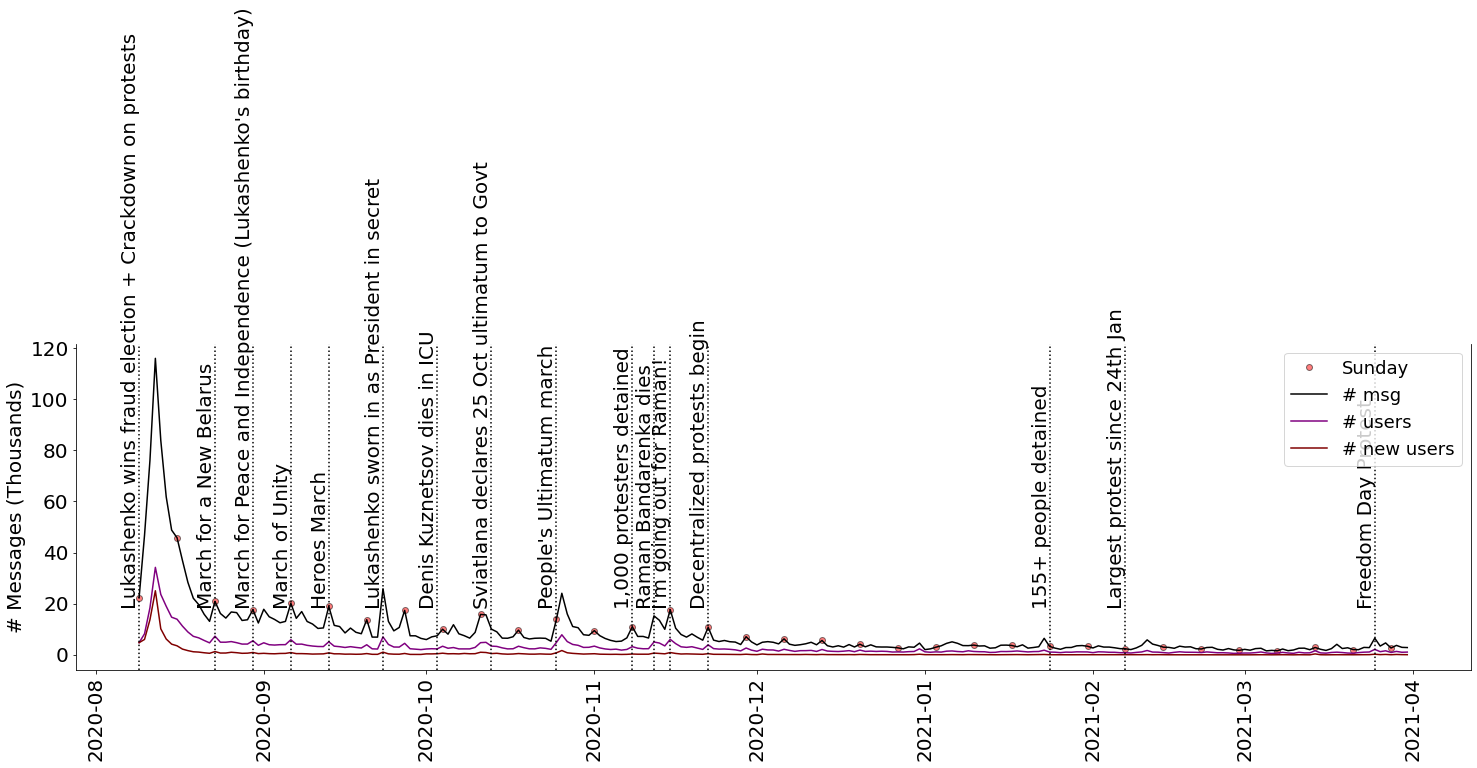

In [141]:
# Plot volume 
from matplotlib import colors
import datetime

data = merged_data_K
events_data = events2

ax = data.plot(
    x="date", 
    y="tot_msgs",
    logy=False, 
    color="black", 
    figsize=(25,6),
    style='o', 
    mfc = colors.to_rgba("red", 0.5),
    markevery = np.where(data.day_of_week == "Sunday", True, False))

data.plot(x="date", y="tot_msgs", logy=False, ax=ax, color="black")
data.plot(x="date", y="tot_users", logy=False, ax=ax, color="purple")
data.plot(x="date", y="tot_new_users", logy=False, ax=ax, color="maroon")

time_change = datetime.timedelta(hours=80)
for i in range(events_data.shape[0]):
    plt.axvline(x=events_data.dates[i], color="k", linestyle=':')
    plt.text(events_data.dates[i]-time_change,18, events_data.incident_description[i],
    rotation=90, va="bottom", fontsize=20)

plt.xticks(rotation=90)
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.xlabel("")  
plt.ylabel("# Messages (Thousands)")      

ax.legend(["Sunday", "# msg", "# users", "# new users"], fontsize=18)
ax.spines['top'].set_visible(False)


In [92]:
data

,date,tot_msgs,tot_users,tot_new_users,day_of_week_x,num_prisoners,num_incidents,day_of_week_y
10,2020-08-19,22163,7274,1232,Wednesday,5.0,5.0,Wednesday
11,2020-08-20,19668,6671,1106,Thursday,1.0,8.0,Thursday
12,2020-08-21,15902,5659,844,Friday,0.0,5.0,Friday
13,2020-08-22,13131,4715,639,Saturday,2.0,13.0,Saturday
14,2020-08-23,20918,7328,1304,Sunday,0.0,41.0,Sunday
...,...,...,...,...,...,...,...,...
230,2021-03-27,4691,1616,192,Saturday,1.0,293.0,Saturday
231,2021-03-28,2707,956,75,Sunday,0.0,12.0,Sunday
232,2021-03-29,3725,1371,179,Monday,4.0,3.0,Monday
233,2021-03-30,2962,1035,111,Tuesday,1.0,2.0,Tuesday


/var/folders/ht/m3lhbch97rbfp8h0sn087g240000gn/T/ipykernel_38256/2848872123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={


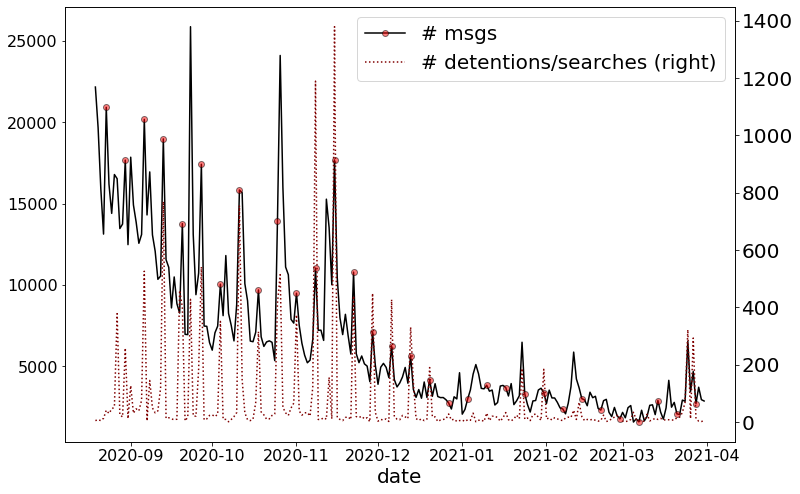

In [136]:
#min_date = 
fig, ax = plt.subplots()
plt.xticks(rotation=70)

data = with_viasna.loc[10:,:]

data.rename(columns={
    "tot_msgs": "# msgs",
    "num_incidents":"# detentions/searches", 
    "num_prisoners": "# political prisoners"}, inplace=True)
    
data.plot( 
    x="date",
    y="# msgs", 
    logy=False, 
    color="black", 
    figsize=(12,8),
    style='-o', 
    mfc = colors.to_rgba("red", 0.5), 
    markevery = np.where(data.day_of_week_x == "Sunday", True, False), ax=ax)

data.plot( 
    x="date",
    y="# detentions/searches", 
    logy=False, color="maroon", 
    linestyle=":", 
    ax=ax, 
    secondary_y=True)

ax.tick_params(labelsize = 16)
#viasna.plot(x="date", y="num_incidents", logy=False, color="red", linestyle=":", ax=ax,secondary_y=True)



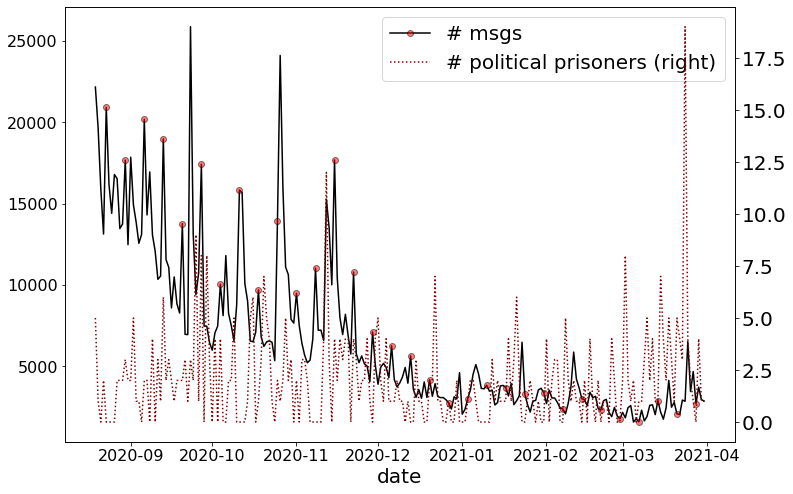

In [137]:
ax = data.plot(
    x="date", 
    y="# msgs", 
    logy=False, 
    color="black", 
    figsize=(12,8),
    style='-o', 
    mfc = colors.to_rgba("red", 0.5), 
    markevery = np.where(data.day_of_week_x == "Sunday", True, False))

data.plot(
    x="date", 
    y="# political prisoners", 
    logy=False, 
    color="maroon", 
    linestyle=":", 
    ax=ax, 
    secondary_y=True)

ax.tick_params(labelsize = 16)


#viasna.plot(x="date", y="num_incidents", logy=False, color="red", linestyle=":", ax=ax,secondary_y=True)


Text(0.5, 1.0, 'Correlation between Detentions and political imprisonment is low = 0.25')

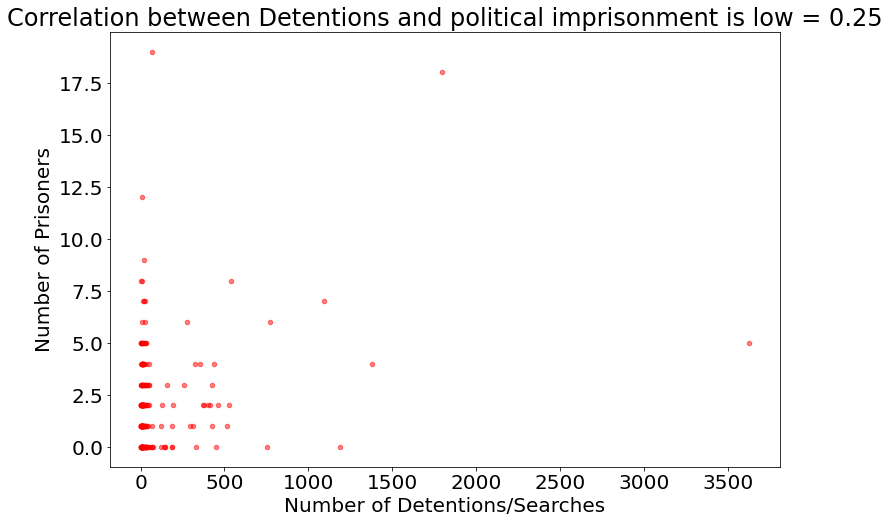

In [88]:
viasna.plot(x="num_incidents", y="num_prisoners", kind="scatter", figsize=(12,8), color="red", alpha=0.5)
plt.xlabel("Number of Detentions/Searches")
plt.ylabel("Number of Prisoners")
plt.title("Correlation between Detentions and political imprisonment is low = 0.25")

In [68]:
ax = df_total.plot(x="date", y="tot_msgs", logy=True, color="black", figsize=(10,8),style='o', 
    mfc = colors.to_rgba("red", 0.5),
    markevery = np.where(data.day_of_week_x == "Sunday", True, False))
df_total.plot(x="date", y="tot_users", logy=True, ax=ax, color="purple")
df_total.plot(x="date", y="tot_new_users", logy=True, ax=ax, color="maroon")
df_total.plot(x="date", y="num_emojis", logy=True, ax=ax, color="blue")

ax.legend(["# msg", "# users", "# new users", "# emojis"]);

NameError: name 'df_total' is not defined

In [91]:
df.num_emojis

0          1
1          0
2          0
3          0
4          0
          ..
2279352    0
2279353    2
2279354    1
2279355    1
2279356    3
Name: num_emojis, Length: 2279357, dtype: int64

In [8]:
df_final.date = pd.to_datetime(df_final.date)

In [43]:
df_final["luka"] = df_final.message.str.contains("лукаш")

In [44]:
daily_luka = df_final[df_final["luka"]==True].groupby(["date"])["message"].count().reset_index()

In [46]:
daily_luka["dayofweek"] = daily_luka.date.dt.dayofweek

In [10]:
daily_msg_count = df_final.groupby(["date"])["message"].count().reset_index()
daily_msg_count["dayofweek"] = daily_msg_count.date.dt.dayofweek

In [12]:
daily_msg_count["is_weekend"] = daily_msg_count.date.dt.dayofweek > 4

<AxesSubplot:xlabel='date'>

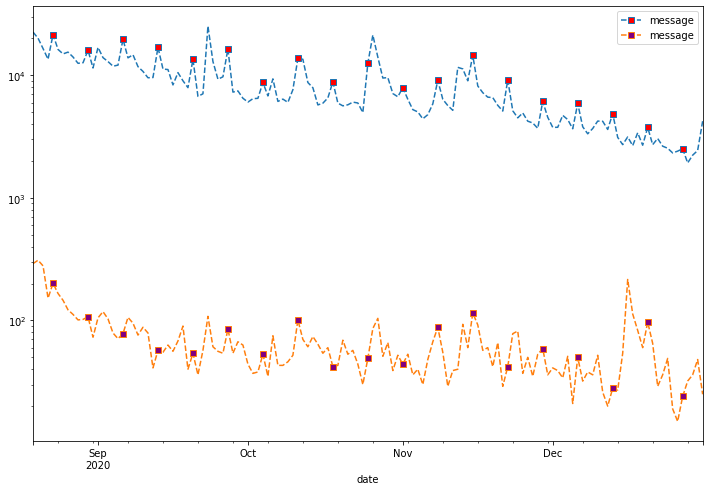

In [50]:
ax = daily_msg_count[10:145].plot(
    x="date", 
    y="message", 
    logy=True,
    figsize=(12,8),
    style='s--', 
    mfc = "red",
    markevery = np.where(daily_msg_count[10:145].date.dt.dayofweek > 5, True, False)
    )

daily_luka[10:145].plot(
    x="date", 
    y="message", 
    #logy=True,
    figsize=(12,8),
    style='s--', 
    mfc = "purple",
    markevery = np.where(daily_luka[10:145].date.dt.dayofweek > 5, True, False),
    ax=ax
)
